In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd 
from scipy import stats 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt
from phik import resources, phik_matrix 
from sklearn import preprocessing
from rdkit.Chem import Descriptors
from catboost import CatBoostRegressor, cv
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [15]:
absolute_path = os.path.abspath("ToxicDataset _на диск.csv")
print(absolute_path)

df = pd.read_csv(absolute_path, delimiter=',')
df

/home/nikita/Документы/PythonVSC/ToxicDataset _на диск.csv


TAID  Pubchem CID  \
0         TOX-145          785   
1         TOX-245         5453   
2        TOX-1273          727   
3        TOX-1279         4091   
4        TOX-1282        10364   
...           ...          ...   
35294  TOX-109816     14164316   
35295  TOX-109817       216337   
35296  TOX-113361         3518   
35297  TOX-113362         5342   
35298  TOX-113365    135398740   

                                              IUPAC Name  \
0                                       benzene-1,4-diol   
1      tris(aziridin-1-yl)-sulfanylidene-lambda5-phos...   
2                      1,2,3,4,5,6-hexachlorocyclohexane   
3           3-(diaminomethylidene)-1,1-dimethylguanidine   
4                           2-methyl-5-propan-2-ylphenol   
...                                                  ...   
35294  [3-acetyloxy-2-(cyclohexylcarbamoylamino)-6-[[...   
35295  7-[3-[cyclohexyl(methyl)amino]propyl]-1,3-dime...   
35296                  2-[2-(azocan-1-yl)ethyl]guanidine   
35297  4-[2-(benzenesulfinyl)ethyl]-1,2-diphenylpyraz...   
35298  2-amino-9-(1,3-dihydroxypropan-2-yloxymethyl)-...   

                                                  SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
35294  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296                                N=C(N)NCCN1CCCCCCC1   
35297   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

                                        Canonical SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
35294  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296                                N=C(N)NCCN1CCCCCCC1   
35297   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

                          InChIKey  mouse_intraperitoneal_LD50  
0      QIGBRXMKCJKVMJ-UHFFFAOYSA-N                    3.041835  
1      FOCVUCIESVLUNU-UHFFFAOYSA-N                    4.235584  
2      JLYXXMFPNIAWKQ-UHFFFAOYSA-N                    3.366732  
3      XZWYZXLIPXDOLR-UHFFFAOYSA-N                    2.641604  
4      RECUKUPTGUEGMW-UHFFFAOYSA-N                    3.311627  
...                            ...                         ...  
35294  PTTQJFKYIWSJCJ-UHFFFAOYSA-N                    3.467907  
35295  YSSDOJFBBPZKBV-UHFFFAOYSA-N                    3.454827  
35296  ACGDKVXYNVEAGU-UHFFFAOYSA-N                    3.169717  
35297  MBGGBVCUIVRRBF-UHFFFAOYSA-N                    3.606909  
35298  IRSCQMHQWWYFCW-UHFFFAOYSA-N                    2.406939  

[35299 rows x 7 columns]

In [16]:
df.dtypes

TAID                           object
Pubchem CID                     int64
IUPAC Name                     object
SMILES                         object
Canonical SMILES               object
InChIKey                       object
mouse_intraperitoneal_LD50    float64
dtype: object

In [17]:
print('всего пропусков: '+ str(df.isnull().sum().sum()))

всего пропусков: 1957


In [18]:
df = df.dropna()
df

TAID  Pubchem CID  \
0         TOX-145          785   
1         TOX-245         5453   
2        TOX-1273          727   
3        TOX-1279         4091   
4        TOX-1282        10364   
...           ...          ...   
35294  TOX-109816     14164316   
35295  TOX-109817       216337   
35296  TOX-113361         3518   
35297  TOX-113362         5342   
35298  TOX-113365    135398740   

                                              IUPAC Name  \
0                                       benzene-1,4-diol   
1      tris(aziridin-1-yl)-sulfanylidene-lambda5-phos...   
2                      1,2,3,4,5,6-hexachlorocyclohexane   
3           3-(diaminomethylidene)-1,1-dimethylguanidine   
4                           2-methyl-5-propan-2-ylphenol   
...                                                  ...   
35294  [3-acetyloxy-2-(cyclohexylcarbamoylamino)-6-[[...   
35295  7-[3-[cyclohexyl(methyl)amino]propyl]-1,3-dime...   
35296                  2-[2-(azocan-1-yl)ethyl]guanidine   
35297  4-[2-(benzenesulfinyl)ethyl]-1,2-diphenylpyraz...   
35298  2-amino-9-(1,3-dihydroxypropan-2-yloxymethyl)-...   

                                                  SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
35294  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296                                N=C(N)NCCN1CCCCCCC1   
35297   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

                                        Canonical SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
35294  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296                                N=C(N)NCCN1CCCCCCC1   
35297   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

                          InChIKey  mouse_intraperitoneal_LD50  
0      QIGBRXMKCJKVMJ-UHFFFAOYSA-N                    3.041835  
1      FOCVUCIESVLUNU-UHFFFAOYSA-N                    4.235584  
2      JLYXXMFPNIAWKQ-UHFFFAOYSA-N                    3.366732  
3      XZWYZXLIPXDOLR-UHFFFAOYSA-N                    2.641604  
4      RECUKUPTGUEGMW-UHFFFAOYSA-N                    3.311627  
...                            ...                         ...  
35294  PTTQJFKYIWSJCJ-UHFFFAOYSA-N                    3.467907  
35295  YSSDOJFBBPZKBV-UHFFFAOYSA-N                    3.454827  
35296  ACGDKVXYNVEAGU-UHFFFAOYSA-N                    3.169717  
35297  MBGGBVCUIVRRBF-UHFFFAOYSA-N                    3.606909  
35298  IRSCQMHQWWYFCW-UHFFFAOYSA-N                    2.406939  

[33342 rows x 7 columns]

In [19]:
print('кол-во дубликатов строк:' + str(df.duplicated().sum()))

кол-во дубликатов строк:0


In [20]:
x = 0
for column in df.columns:
    print('различные дубликаты в '+str(column)+': '+str(df[column].duplicated().sum()))
    x+=df[column].duplicated().sum()
print('кол-во различных дубликатов значений всего: ' + str(x))

различные дубликаты в TAID: 0
различные дубликаты в Pubchem CID: 0
различные дубликаты в IUPAC Name: 0
различные дубликаты в SMILES: 0
различные дубликаты в Canonical SMILES: 0
различные дубликаты в InChIKey: 0
различные дубликаты в mouse_intraperitoneal_LD50: 2350
кол-во различных дубликатов значений всего: 2350


In [21]:
print('Дубликаты в mouse_intraperitoneal_LD50 удалять не будем, т.к. эти значения могут быть неуникальными')

Дубликаты в mouse_intraperitoneal_LD50 удалять не будем, т.к. эти значения могут быть неуникальными


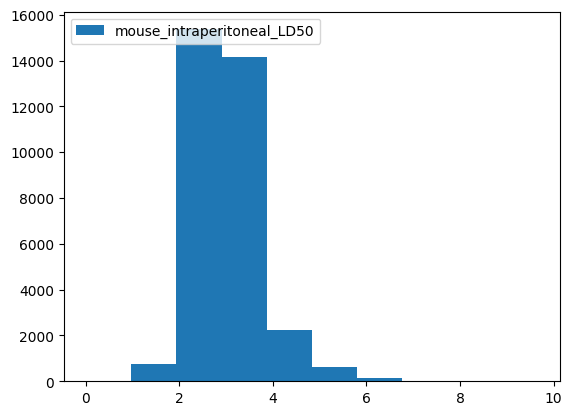

In [22]:
plt.hist(df['mouse_intraperitoneal_LD50'])
plt.legend({'mouse_intraperitoneal_LD50'}, loc='upper left')
plt.show()

In [23]:
x=[]
for value in df['Canonical SMILES']:
    x.append(len(value))
print('средняя длина значения SMILES: '+str(sum(x)/len(x)))

средняя длина значения SMILES: 35.94202507348089


In [24]:
x1=[]
for value in df['Canonical SMILES']:
    m = Chem.MolFromSmiles(value)
    x1.append(m.GetNumAtoms())
print('среднее кол-во атомов в молекуле без водорода: '+str(sum(x1)/len(x1)))


среднее кол-во атомов в молекуле без водорода: 21.505848479395357


In [25]:
x2=[]
for value in df['Canonical SMILES']:
    m = Chem.MolFromSmiles(value)
    x2.append(m.GetNumAtoms(onlyExplicit=False))
print('среднее кол-во атомов в молекуле с водородом: '+str(sum(x2)/len(x2)))

среднее кол-во атомов в молекуле с водородом: 41.770679623297944


In [42]:
print('Далее идет расчет feature_importance/важности для mouse_intraperitoneal_LD50 у датафрейма дескрипторов, наиболее важные для mouse_intraperitoneal_LD50 признаки пойдут в финальный датафрейм для обучения модели')

Далее идет расчет feature_importance/важности для mouse_intraperitoneal_LD50 у датафрейма дескрипторов, наиболее важные для mouse_intraperitoneal_LD50 признаки пойдут в финальный датафрейм для обучения модели


[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerator
[22:52:29] DEPRECATION WARNING: please use MorganGenerat

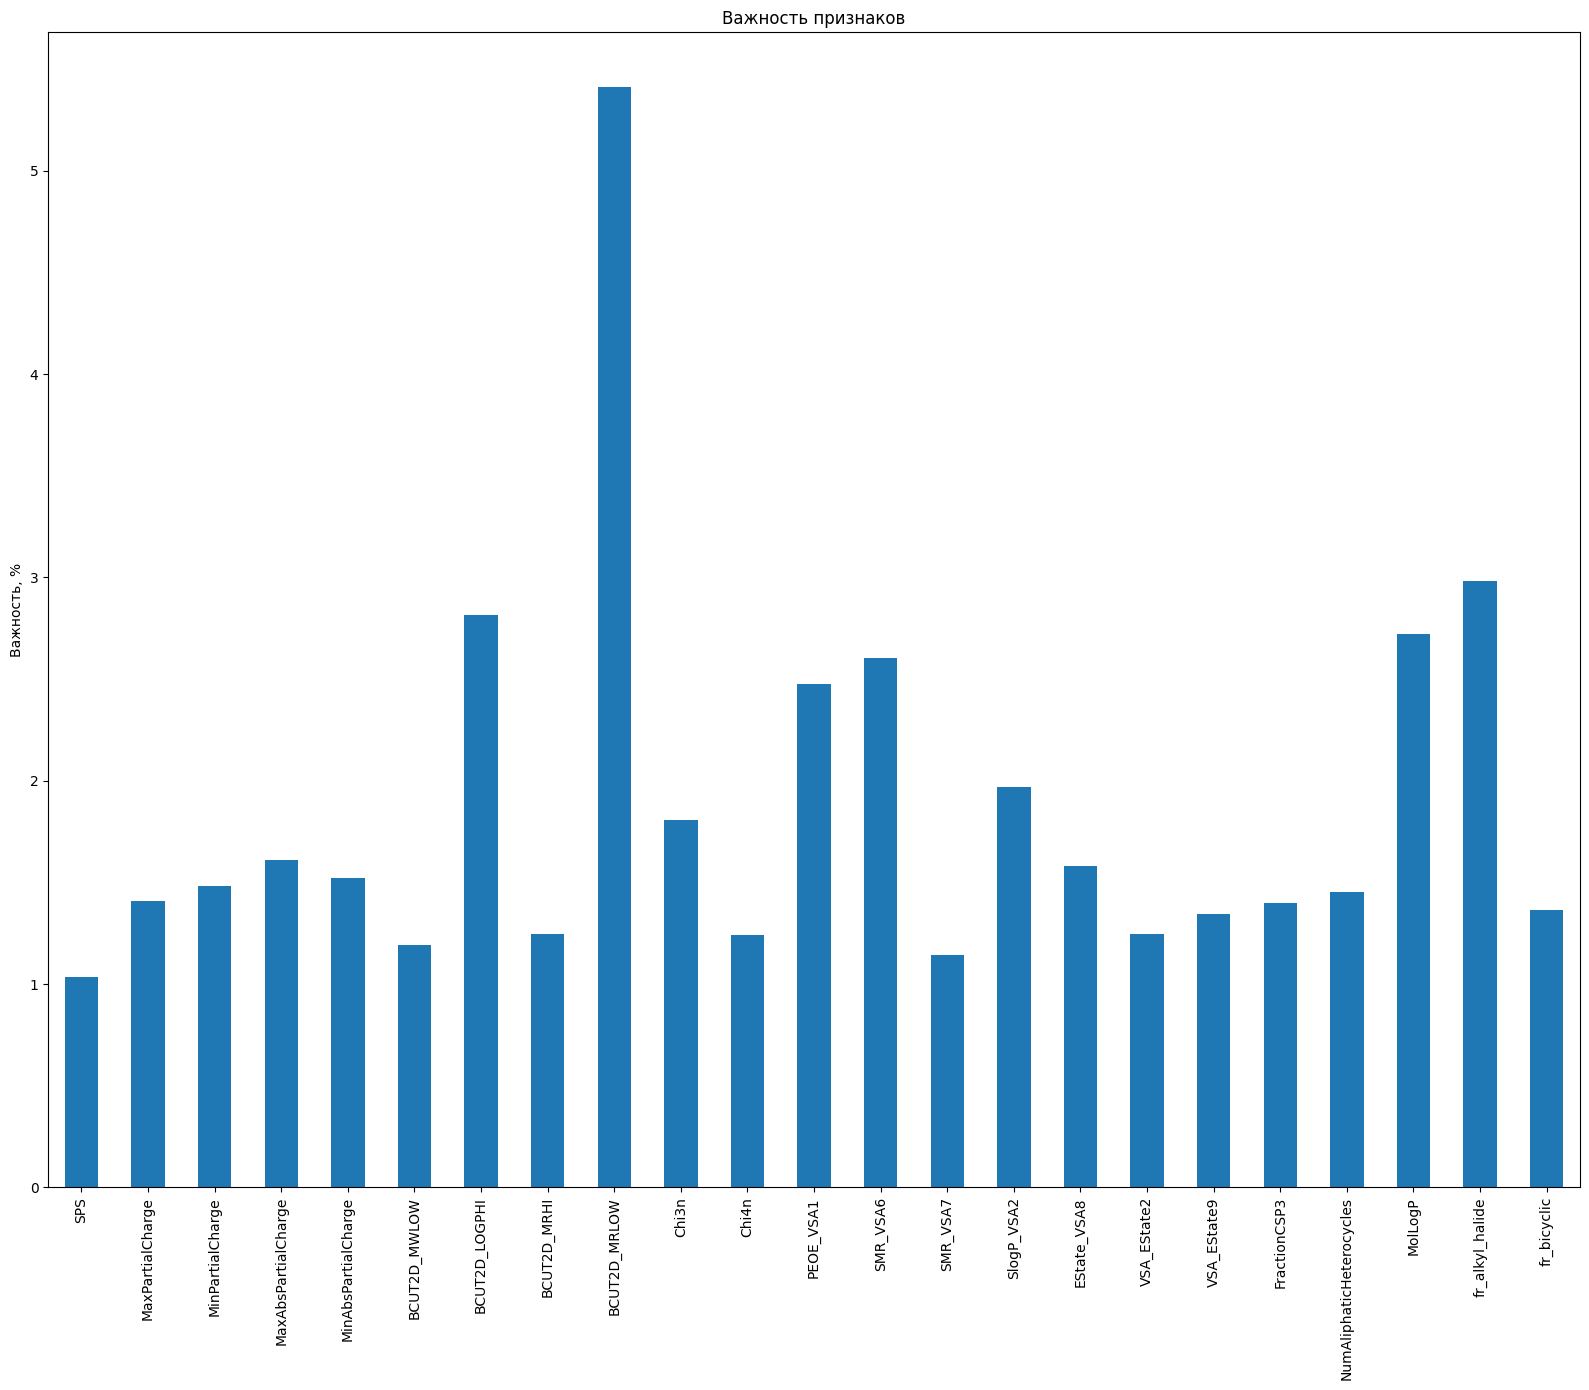

In [26]:
x = []
df_test1 = df
for value in df_test1['SMILES']:
    m = Chem.MolFromSmiles(value)
    x.append(m)

descrs = [Descriptors.CalcMolDescriptors(mol) for mol in x]

df_descr = pd.DataFrame(descrs)





model_cat_test = CatBoostRegressor(iterations = 1000, learning_rate= 0.1, verbose = False)
model_cat_test.fit(X=df_descr, y=df['mouse_intraperitoneal_LD50'])

cat_imp = pd.Series(model_cat_test.get_feature_importance(), index=df_descr.columns)


cat_imp_filtered = cat_imp.loc[cat_imp >= 1]


fig, ax = plt.subplots(figsize=(16, 14))
cat_imp_filtered.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()




In [27]:
print(df['Canonical SMILES'].isna().sum())

0


In [28]:
y = []
for value in df['SMILES']:
    m = Chem.MolFromSmiles(value)
    y.append(MACCSkeys.GenMACCSKeys(m).ToBitString())

df['MACCS'] = y
df

/tmp/ipykernel_130660/4079391653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACCS'] = y


TAID  Pubchem CID  \
0         TOX-145          785   
1         TOX-245         5453   
2        TOX-1273          727   
3        TOX-1279         4091   
4        TOX-1282        10364   
...           ...          ...   
35294  TOX-109816     14164316   
35295  TOX-109817       216337   
35296  TOX-113361         3518   
35297  TOX-113362         5342   
35298  TOX-113365    135398740   

                                              IUPAC Name  \
0                                       benzene-1,4-diol   
1      tris(aziridin-1-yl)-sulfanylidene-lambda5-phos...   
2                      1,2,3,4,5,6-hexachlorocyclohexane   
3           3-(diaminomethylidene)-1,1-dimethylguanidine   
4                           2-methyl-5-propan-2-ylphenol   
...                                                  ...   
35294  [3-acetyloxy-2-(cyclohexylcarbamoylamino)-6-[[...   
35295  7-[3-[cyclohexyl(methyl)amino]propyl]-1,3-dime...   
35296                  2-[2-(azocan-1-yl)ethyl]guanidine   
35297  4-[2-(benzenesulfinyl)ethyl]-1,2-diphenylpyraz...   
35298  2-amino-9-(1,3-dihydroxypropan-2-yloxymethyl)-...   

                                                  SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
35294  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296                                N=C(N)NCCN1CCCCCCC1   
35297   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

                                        Canonical SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
35294  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296                                N=C(N)NCCN1CCCCCCC1   
35297   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

                          InChIKey  mouse_intraperitoneal_LD50  \
0      QIGBRXMKCJKVMJ-UHFFFAOYSA-N                    3.041835   
1      FOCVUCIESVLUNU-UHFFFAOYSA-N                    4.235584   
2      JLYXXMFPNIAWKQ-UHFFFAOYSA-N                    3.366732   
3      XZWYZXLIPXDOLR-UHFFFAOYSA-N                    2.641604   
4      RECUKUPTGUEGMW-UHFFFAOYSA-N                    3.311627   
...                            ...                         ...   
35294  PTTQJFKYIWSJCJ-UHFFFAOYSA-N                    3.467907   
35295  YSSDOJFBBPZKBV-UHFFFAOYSA-N                    3.454827   
35296  ACGDKVXYNVEAGU-UHFFFAOYSA-N                    3.169717   
35297  MBGGBVCUIVRRBF-UHFFFAOYSA-N                    3.606909   
35298  IRSCQMHQWWYFCW-UHFFFAOYSA-N                    2.406939   

                                                   MACCS  
0      0000000000000000000000000000000000000000000000...  
1      0000000000000000100000100000010000000000000000...  
2      0000000000000000000000000000000000000000000000...  
3      0000000000000000000000000100000000000000000100...  
4      0000000000000000000000000000000000000000000000...  
...                                                  ...  
35294  0000000000000000000000000010000000000100000100...  
35295  0000000000000000000000000000000000000110000000...  
35296  0000000000000000000000000100000000000000000100...  
35297  0000000000000000000000000000000000000000000000...  

In [40]:
print('Далее вручную берем наиболее многообещающие признаки')

Далее вручную берем наиболее многообещающие признаки


In [29]:

df_descr_filtered = df_descr[['BCUT2D_MRLOW', 'MaxPartialCharge', 'BCUT2D_LOGPHI', 'PEOE_VSA1', 'SMR_VSA6', 
                               'VSA_EState2', 'Chi3n', 'SPS', 'Chi4n', 'TPSA', 'NumAliphaticRings', 'fr_alkyl_halide']]
df_descr_filtered

BCUT2D_MRLOW  MaxPartialCharge  BCUT2D_LOGPHI  PEOE_VSA1   SMR_VSA6  \
0          0.459967          0.115346       2.125523  10.213055   0.000000   
1          0.697386          0.145360       2.649938   0.000000  39.268538   
2          0.543982          0.069267       2.392672   0.000000   0.000000   
3          0.609465          0.219974       1.775096  16.367245  14.095344   
4          0.469624          0.118265       2.218637   5.106527   0.000000   
...             ...               ...            ...        ...        ...   
33337     -0.378217          0.316629       2.748611  74.532498   0.000000   
33338      0.187471          0.331703       2.212461   9.467009  13.592428   
33339      0.250882          0.185250       2.090135  15.950366  26.179026   
33340     -0.126542          0.258409       2.327296   0.000000  15.770679   
33341     -0.048801          0.302124       2.066172  25.667564  18.947431   

       VSA_EState2      Chi3n        SPS      Chi4n    TPSA  \
0         0.000000   0.849709   9.000000   0.452632   40.46   
1         0.000000   2.376177  32.363636   1.452426    9.03   
2         0.000000   1.825253  55.500000   1.053810    0.00   
3         4.958056   0.658608   8.222222   0.222285   91.49   
4         0.000000   1.899859  10.545455   0.985539   20.23   
...            ...        ...        ...        ...     ...   
33337   123.888141  24.386411  39.914894  19.604203  308.88   
33338    31.085078   5.325079  16.333333   3.761347   65.06   
33339     2.467361   2.692165  19.714286   1.885245   65.14   
33340    27.126515   4.813242  15.724138   3.383750   57.69   
33341    21.554369   2.365374  11.500000   1.428192  139.28   

       NumAliphaticRings  fr_alkyl_halide  
0                      0                0  
1                      3                0  
2                      1                6  
3                      0                0  
4                      0                0  
...                  ...              ...  
33337                 10                0  
33338                  1                0  
33339                  1                0  
33340                  1                0  
33341                  0                0  

[33342 rows x 12 columns]

In [30]:


df_filtered = df[['TAID', 'Canonical SMILES', 'mouse_intraperitoneal_LD50', 'MACCS']]

df_filtered

TAID                                   Canonical SMILES  \
0         TOX-145                                       Oc1ccc(O)cc1   
1         TOX-245                             S=P(N1CC1)(N1CC1)N1CC1   
2        TOX-1273                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3        TOX-1279                                  CN(C)C(=N)N=C(N)N   
4        TOX-1282                                  Cc1ccc(C(C)C)cc1O   
...           ...                                                ...   
35294  TOX-109816  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
35295  TOX-109817           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
35296  TOX-113361                                N=C(N)NCCN1CCCCCCC1   
35297  TOX-113362   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
35298  TOX-113365                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

       mouse_intraperitoneal_LD50  \
0                        3.041835   
1                        4.235584   
2                        3.366732   
3                        2.641604   
4                        3.311627   
...                           ...   
35294                    3.467907   
35295                    3.454827   
35296                    3.169717   
35297                    3.606909   
35298                    2.406939   

                                                   MACCS  
0      0000000000000000000000000000000000000000000000...  
1      0000000000000000100000100000010000000000000000...  
2      0000000000000000000000000000000000000000000000...  
3      0000000000000000000000000100000000000000000100...  
4      0000000000000000000000000000000000000000000000...  
...                                                  ...  
35294  0000000000000000000000000010000000000100000100...  
35295  0000000000000000000000000000000000000110000000...  
35296  0000000000000000000000000100000000000000000100...  
35297  0000000000000000000000000000000000000000000000...  
35298  0000000000000000000000000100100000000010000100...  

[33342 rows x 4 columns]

In [41]:
print('Создаем датафрейм на основе датафрейма дескрипторов и изначального датафрейма')

Создаем датафрейм на основе датафрейма дескрипторов и изначального датафрейма


In [31]:
final_df = pd.concat([df_descr_filtered.reset_index(drop=True), df_filtered.reset_index(drop=True)], axis = 1)


final_df

BCUT2D_MRLOW  MaxPartialCharge  BCUT2D_LOGPHI  PEOE_VSA1   SMR_VSA6  \
0          0.459967          0.115346       2.125523  10.213055   0.000000   
1          0.697386          0.145360       2.649938   0.000000  39.268538   
2          0.543982          0.069267       2.392672   0.000000   0.000000   
3          0.609465          0.219974       1.775096  16.367245  14.095344   
4          0.469624          0.118265       2.218637   5.106527   0.000000   
...             ...               ...            ...        ...        ...   
33337     -0.378217          0.316629       2.748611  74.532498   0.000000   
33338      0.187471          0.331703       2.212461   9.467009  13.592428   
33339      0.250882          0.185250       2.090135  15.950366  26.179026   
33340     -0.126542          0.258409       2.327296   0.000000  15.770679   
33341     -0.048801          0.302124       2.066172  25.667564  18.947431   

       VSA_EState2      Chi3n        SPS      Chi4n    TPSA  \
0         0.000000   0.849709   9.000000   0.452632   40.46   
1         0.000000   2.376177  32.363636   1.452426    9.03   
2         0.000000   1.825253  55.500000   1.053810    0.00   
3         4.958056   0.658608   8.222222   0.222285   91.49   
4         0.000000   1.899859  10.545455   0.985539   20.23   
...            ...        ...        ...        ...     ...   
33337   123.888141  24.386411  39.914894  19.604203  308.88   
33338    31.085078   5.325079  16.333333   3.761347   65.06   
33339     2.467361   2.692165  19.714286   1.885245   65.14   
33340    27.126515   4.813242  15.724138   3.383750   57.69   
33341    21.554369   2.365374  11.500000   1.428192  139.28   

       NumAliphaticRings  fr_alkyl_halide        TAID  \
0                      0                0     TOX-145   
1                      3                0     TOX-245   
2                      1                6    TOX-1273   
3                      0                0    TOX-1279   
4                      0                0    TOX-1282   
...                  ...              ...         ...   
33337                 10                0  TOX-109816   
33338                  1                0  TOX-109817   
33339                  1                0  TOX-113361   
33340                  1                0  TOX-113362   
33341                  0                0  TOX-113365   

                                        Canonical SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
33337  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
33338           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
33339                                N=C(N)NCCN1CCCCCCC1   
33340   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
33341                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

       mouse_intraperitoneal_LD50  \
0                        3.041835   
1                        4.235584   
2                        3.366732   
3                        2.641604   
4                        3.311627   
...                           ...   
33337                    3.467907   
33338                    3.454827   
33339                    3.169717   
33340                    3.606909   
33341                    2.406939   

                                                   MACCS  
0      0000000000000000000000000000000000000000000000...  
1      0000000000000000100000100000010000000000000000...  
2      0000000000000000000000000000000000000000000000...  
3      0000000000000000000000000100000000000000000100...  
4      0000000000000000000000000000000000000000000000...  
...                                                  ...  
33337  000000000000000000000000001000000000010000

In [32]:
print('Далее в датафрейм добавляются полученные ранее параметры кол-ва атомов в молекуле, в качестве дескрипторов.')

Далее в датафрейм добавляются полученные ранее параметры кол-ва атомов в молекуле, в качестве дескрипторов.


In [33]:
final_df['AtomCount'] = x1
final_df['AtomCountH'] = x2
final_df

BCUT2D_MRLOW  MaxPartialCharge  BCUT2D_LOGPHI  PEOE_VSA1   SMR_VSA6  \
0          0.459967          0.115346       2.125523  10.213055   0.000000   
1          0.697386          0.145360       2.649938   0.000000  39.268538   
2          0.543982          0.069267       2.392672   0.000000   0.000000   
3          0.609465          0.219974       1.775096  16.367245  14.095344   
4          0.469624          0.118265       2.218637   5.106527   0.000000   
...             ...               ...            ...        ...        ...   
33337     -0.378217          0.316629       2.748611  74.532498   0.000000   
33338      0.187471          0.331703       2.212461   9.467009  13.592428   
33339      0.250882          0.185250       2.090135  15.950366  26.179026   
33340     -0.126542          0.258409       2.327296   0.000000  15.770679   
33341     -0.048801          0.302124       2.066172  25.667564  18.947431   

       VSA_EState2      Chi3n        SPS      Chi4n    TPSA  \
0         0.000000   0.849709   9.000000   0.452632   40.46   
1         0.000000   2.376177  32.363636   1.452426    9.03   
2         0.000000   1.825253  55.500000   1.053810    0.00   
3         4.958056   0.658608   8.222222   0.222285   91.49   
4         0.000000   1.899859  10.545455   0.985539   20.23   
...            ...        ...        ...        ...     ...   
33337   123.888141  24.386411  39.914894  19.604203  308.88   
33338    31.085078   5.325079  16.333333   3.761347   65.06   
33339     2.467361   2.692165  19.714286   1.885245   65.14   
33340    27.126515   4.813242  15.724138   3.383750   57.69   
33341    21.554369   2.365374  11.500000   1.428192  139.28   

       NumAliphaticRings  fr_alkyl_halide        TAID  \
0                      0                0     TOX-145   
1                      3                0     TOX-245   
2                      1                6    TOX-1273   
3                      0                0    TOX-1279   
4                      0                0    TOX-1282   
...                  ...              ...         ...   
33337                 10                0  TOX-109816   
33338                  1                0  TOX-109817   
33339                  1                0  TOX-113361   
33340                  1                0  TOX-113362   
33341                  0                0  TOX-113365   

                                        Canonical SMILES  \
0                                           Oc1ccc(O)cc1   
1                                 S=P(N1CC1)(N1CC1)N1CC1   
2                           ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   
3                                      CN(C)C(=N)N=C(N)N   
4                                      Cc1ccc(C(C)C)cc1O   
...                                                  ...   
33337  CC(=O)OC1C(NC(=O)NC2CCCCC2)OC(OC2C(OC3CCC4(C)C...   
33338           CN(CCCn1cnc2c1c(=O)n(C)c(=O)n2C)C1CCCCC1   
33339                                N=C(N)NCCN1CCCCCCC1   
33340   O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1   
33341                   Nc1nc(=O)c2ncn(COC(CO)CO)c2[nH]1   

       mouse_intraperitoneal_LD50  \
0                        3.041835   
1                        4.235584   
2                        3.366732   
3                        2.641604   
4                        3.311627   
...                           ...   
33337                    3.467907   
33338                    3.454827   
33339                    3.169717   
33340                    3.606909   
33341                    2.406939   

                                                   MACCS  AtomCount  \
0      0000000000000000000000000000000000000000000000...          8   
1      0000000000000000100000100000010000000000000000...         11   
2      0000000000000000000000000000000000000000000000...         12   
3      0000000000000000000000000100000000000000000100...          9   
4      0000000000000000000000000000000000000000000000...         11   
...                                 

/home/nikita/.local/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step


interval columns not set, guessing: ['BCUT2D_MRLOW', 'MaxPartialCharge', 'BCUT2D_LOGPHI', 'PEOE_VSA1', 'SMR_VSA6', 'VSA_EState2', 'Chi3n', 'SPS', 'Chi4n', 'TPSA', 'NumAliphaticRings', 'fr_alkyl_halide', 'mouse_intraperitoneal_LD50', 'AtomCount', 'AtomCountH']


/home/nikita/.local/lib/python3.12/site-packages/phik/phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


<Axes: >

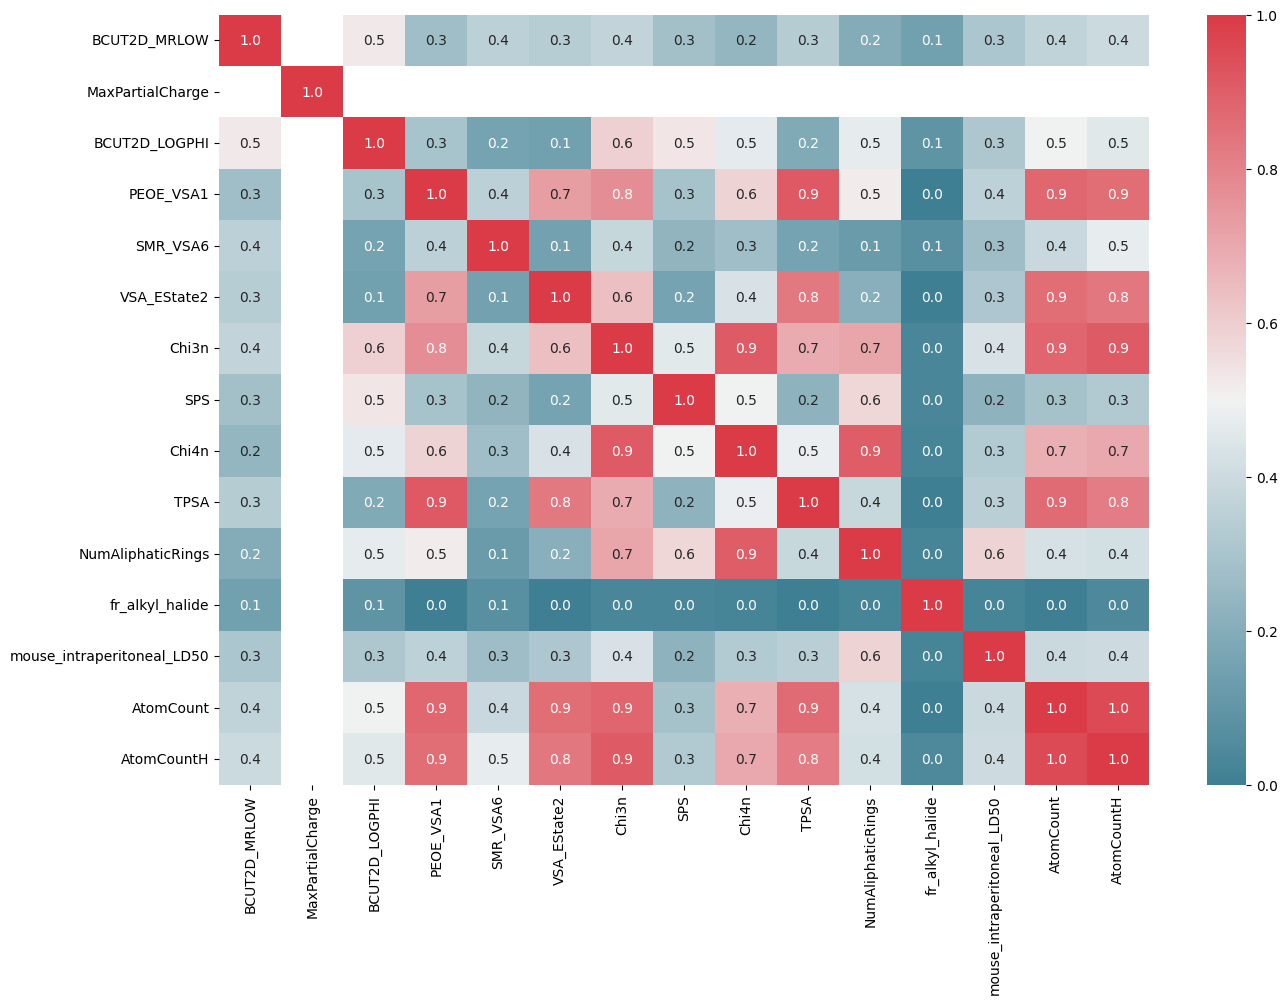

In [34]:
f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlation_matrix = final_df.drop(['TAID', 'Canonical SMILES', 'MACCS'], axis = 1).phik_matrix()

sns.heatmap(
    correlation_matrix,
    cmap=cmap,
    annot=True,
    fmt=".1f"
)

In [35]:
print('Матрица корреляции Фика для полученного датафрейма, P.S. некоторые дескрипторы были удалены из датафрейма по результатам зависимости.')

Матрица корреляции Фика для полученного датафрейма, P.S. некоторые дескрипторы были удалены из датафрейма по результатам зависимости.


In [36]:
X = final_df.drop(['mouse_intraperitoneal_LD50', 'TAID', 'Canonical SMILES', ], axis=1)
y = final_df['mouse_intraperitoneal_LD50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_cat = CatBoostRegressor(iterations = 1000, learning_rate= 0.1, verbose = False)
model_cat.fit(X_train, y_train)

y_pred = model_cat.predict(X_test)

print(y_pred)

   

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

[3.26259721 3.11715505 2.69950013 ... 3.47898619 2.68085834 3.95374754]
R^2 Score: 0.5163539928596803


In [37]:
print('Полученное значение точности незначительно выше 0.5, на результат повлияла небольшая выборка дескрипторов из списка наиболее эффективных. Вероятно, что если добавить ещё 10-15 дескрипторов из графика feature_importance, то точность модели возрастет. На результат также может влиять зависимость между отдельными параметрами.')

Полученное значение точности незначительно выше 0.5, на результат повлияла небольшая выборка дескрипторов из списка наиболее эффективных. Вероятно, что если добавить ещё 10-15 дескрипторов из графика feature_importance, то точность модели возрастет. На результат также может влиять зависимость между отдельными параметрами.


In [38]:
final_df.to_csv('Toxic_Descriptors_Final_Dataset.csv', index=False)